# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

In [2]:
data = pd.read_csv('/content/1year.csv')
df = data.iloc[:, :10]
df['class'] = data['class']
df.head(2)

Attr1    Attr2    Attr3   Attr4   Attr5    Attr6    Attr7    Attr8  \
0  0.20055  0.37951  0.39641  2.0472  32.351  0.38825  0.24976   1.3305   
1  0.20912  0.49988  0.47225  1.9447  14.786        0  0.25834  0.99601   

    Attr9   Attr10  class  
0  1.1389  0.50494      0  
1  1.6996  0.49788      0

In [3]:
df['class'].nunique()

2

In [4]:
df['Attr1'] = pd.to_numeric(df['Attr1'], errors='coerce')
df['Attr2'] = pd.to_numeric(df['Attr2'], errors='coerce')
df['Attr3'] = pd.to_numeric(df['Attr3'], errors='coerce')
df['Attr4'] = pd.to_numeric(df['Attr4'], errors='coerce')
df['Attr5'] = pd.to_numeric(df['Attr5'], errors='coerce')
df['Attr6'] = pd.to_numeric(df['Attr6'], errors='coerce')
df['Attr7'] = pd.to_numeric(df['Attr7'], errors='coerce')
df['Attr8'] = pd.to_numeric(df['Attr8'], errors='coerce')
df['Attr9'] = pd.to_numeric(df['Attr9'], errors='coerce')
df['Attr10'] = pd.to_numeric(df['Attr10'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7009 non-null   float64
 1   Attr2   7009 non-null   float64
 2   Attr3   7009 non-null   float64
 3   Attr4   6982 non-null   float64
 4   Attr5   7004 non-null   float64
 5   Attr6   7009 non-null   float64
 6   Attr7   7009 non-null   float64
 7   Attr8   6987 non-null   float64
 8   Attr9   7011 non-null   float64
 9   Attr10  7009 non-null   float64
 10  class   7012 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 602.7 KB


In [6]:
df.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
class      0
dtype: int64

In [7]:
df.isnull().sum().sum()

82

In [8]:
df['Attr1'].fillna(df['Attr1'].median(),inplace =True)
df['Attr2'].fillna(df['Attr2'].median(),inplace =True)
df['Attr3'].fillna(df['Attr3'].median(),inplace =True)
df['Attr4'].fillna(df['Attr4'].median(),inplace =True)
df['Attr5'].fillna(df['Attr5'].median(),inplace =True)
df['Attr6'].fillna(df['Attr6'].median(),inplace =True)
df['Attr7'].fillna(df['Attr7'].median(),inplace =True)
df['Attr8'].fillna(df['Attr8'].median(),inplace =True)
df['Attr9'].fillna(df['Attr9'].median(),inplace =True)
df['Attr10'].fillna(df['Attr10'].median(),inplace =True)

In [9]:
df.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
class     0
dtype: int64

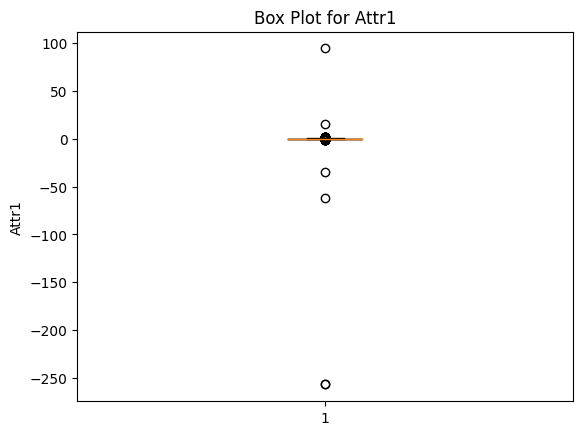

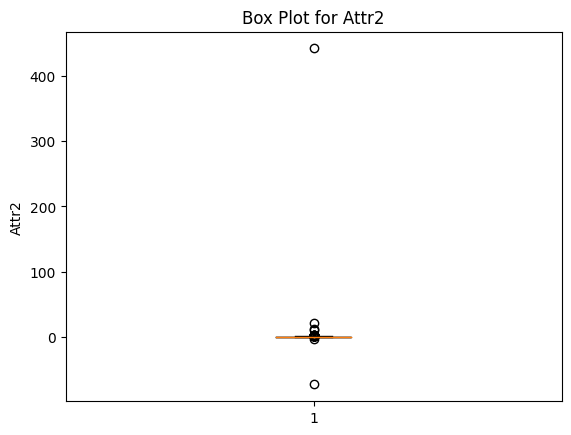

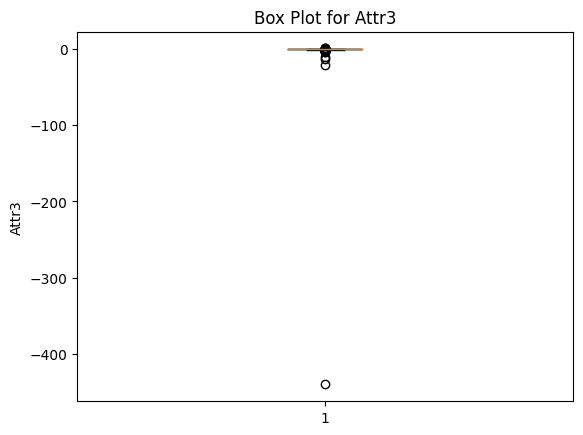

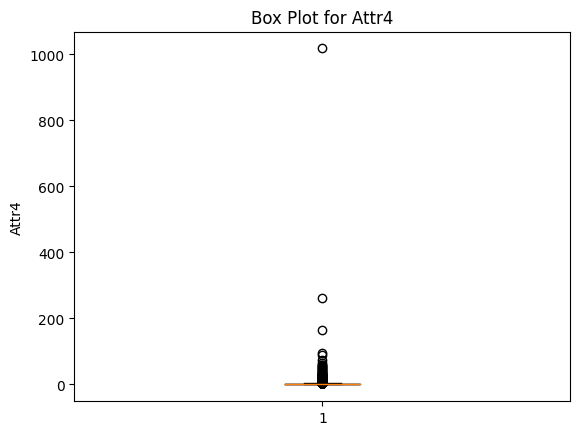

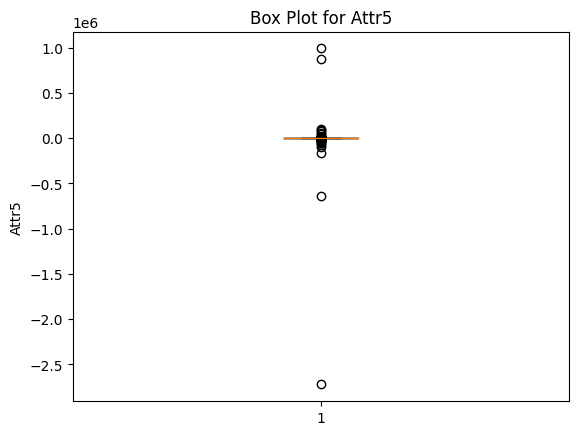

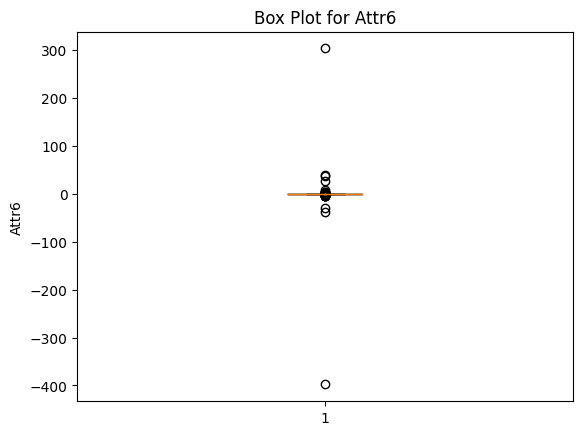

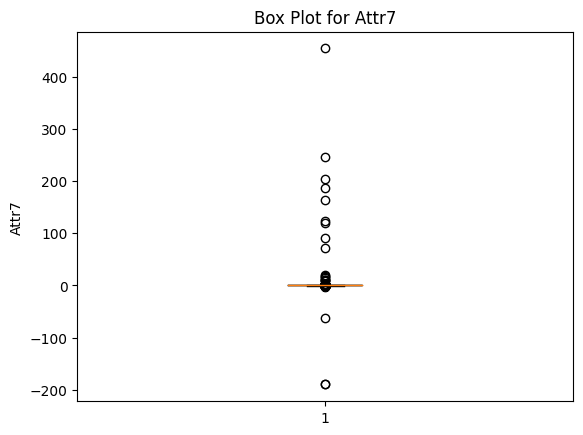

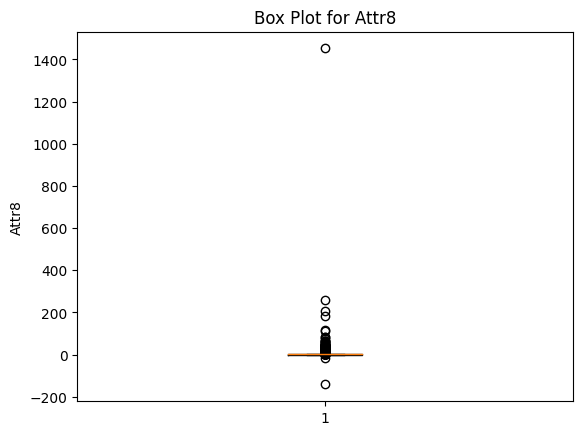

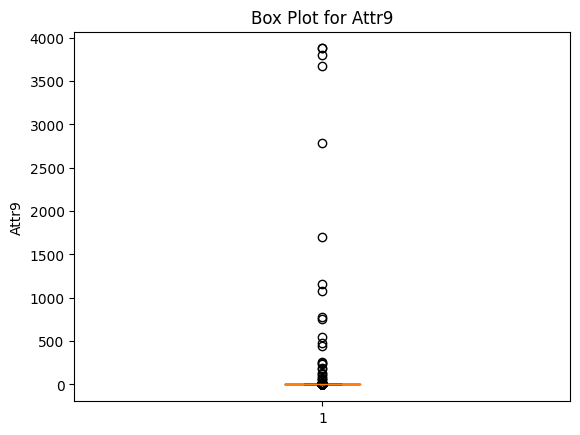

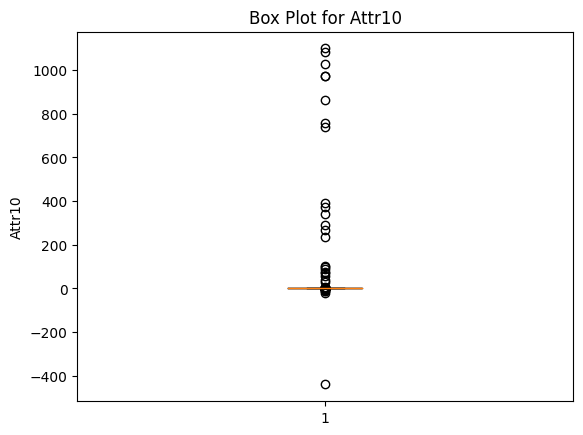

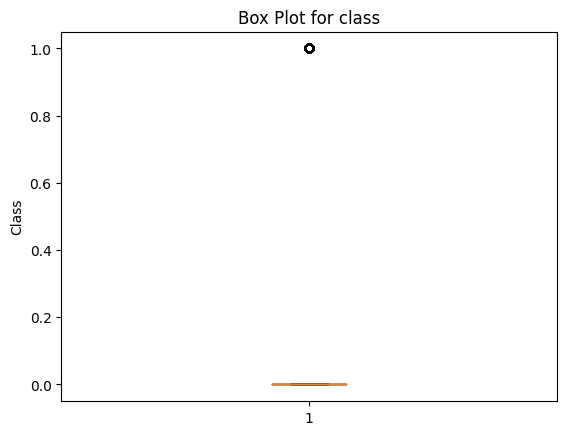

In [10]:
for i in df.select_dtypes(include=['int','float']).columns:
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()

In [11]:
x=df.select_dtypes(include=['int','float']).columns.tolist()
x.remove('class')
for i in x:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {} of train set: {}'.format(i, s))

Number of Outliers in Attr1 of train set: 493
Number of Outliers in Attr2 of train set: 72
Number of Outliers in Attr3 of train set: 128
Number of Outliers in Attr4 of train set: 649
Number of Outliers in Attr5 of train set: 959
Number of Outliers in Attr6 of train set: 921
Number of Outliers in Attr7 of train set: 469
Number of Outliers in Attr8 of train set: 698
Number of Outliers in Attr9 of train set: 481
Number of Outliers in Attr10 of train set: 107


In [12]:
# Function to Replace the Outliers

def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)

        median = df[col].median()

        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])

replace_outliers(df, x)

# Recounting for the number of outliers after removing the outliers.

for i in x:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {} of train set: {}'.format(i, s))

Number of Outliers in Attr1 of train set: 270
Number of Outliers in Attr2 of train set: 5
Number of Outliers in Attr3 of train set: 22
Number of Outliers in Attr4 of train set: 448
Number of Outliers in Attr5 of train set: 480
Number of Outliers in Attr6 of train set: 1247
Number of Outliers in Attr7 of train set: 246
Number of Outliers in Attr8 of train set: 454
Number of Outliers in Attr9 of train set: 428
Number of Outliers in Attr10 of train set: 5


In [13]:
(df.eq('?')).any()

Attr1     False
Attr2     False
Attr3     False
Attr4     False
Attr5     False
Attr6     False
Attr7     False
Attr8     False
Attr9     False
Attr10    False
class     False
dtype: bool

# Exploratory Analysis

##### Descriptive Analysis

In [14]:
df.describe()

Attr1        Attr2        Attr3        Attr4        Attr5  \
count  7012.000000  7012.000000  7012.000000  7012.000000  7012.000000   
mean      0.087257     0.489040     0.201028     1.632909    -3.876968   
std       0.094333     0.248671     0.240993     0.848026    53.979919   
min      -0.186650     0.000000    -0.469670     0.000000  -166.800000   
25%       0.024510     0.296760     0.037581     1.064775   -31.555500   
50%       0.076162     0.482320     0.182170     1.503450    -5.234550   
75%       0.136060     0.670735     0.360150     1.959500    23.078500   
max       0.368510     1.252900     0.865020     4.534600   160.930000   

             Attr6        Attr7        Attr8        Attr9       Attr10  \
count  7012.000000  7012.000000  7012.000000  7012.000000  7012.000000   
mean      0.043682     0.104382     1.199756     1.487737     0.489200   
std       0.102125     0.108990     1.064593     0.700571     0.243055   
min      -0.220210    -0.212090    -2.003200     0.000005    -0.245680   
25%       0.000000     0.031250     0.448965     1.037450     0.311465   
50%       0.000000     0.090330     1.018100     1.206400     0.492930   
75%       0.066151     0.161073     1.593325     1.808025     0.672330   
max       0.367010     0.427830     4.958100     3.765700     1.000000   

             class  
count  7012.000000  
mean      0.036509  
std       0.187566  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [15]:
print("information about the dataset")
df.info()

information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   float64
 1   Attr2   7012 non-null   float64
 2   Attr3   7012 non-null   float64
 3   Attr4   7012 non-null   float64
 4   Attr5   7012 non-null   float64
 5   Attr6   7012 non-null   float64
 6   Attr7   7012 non-null   float64
 7   Attr8   7012 non-null   float64
 8   Attr9   7012 non-null   float64
 9   Attr10  7012 non-null   float64
 10  class   7012 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 602.7 KB


In [16]:
df.describe()

Attr1        Attr2        Attr3        Attr4        Attr5  \
count  7012.000000  7012.000000  7012.000000  7012.000000  7012.000000   
mean      0.087257     0.489040     0.201028     1.632909    -3.876968   
std       0.094333     0.248671     0.240993     0.848026    53.979919   
min      -0.186650     0.000000    -0.469670     0.000000  -166.800000   
25%       0.024510     0.296760     0.037581     1.064775   -31.555500   
50%       0.076162     0.482320     0.182170     1.503450    -5.234550   
75%       0.136060     0.670735     0.360150     1.959500    23.078500   
max       0.368510     1.252900     0.865020     4.534600   160.930000   

             Attr6        Attr7        Attr8        Attr9       Attr10  \
count  7012.000000  7012.000000  7012.000000  7012.000000  7012.000000   
mean      0.043682     0.104382     1.199756     1.487737     0.489200   
std       0.102125     0.108990     1.064593     0.700571     0.243055   
min      -0.220210    -0.212090    -2.003200     0.000005    -0.245680   
25%       0.000000     0.031250     0.448965     1.037450     0.311465   
50%       0.000000     0.090330     1.018100     1.206400     0.492930   
75%       0.066151     0.161073     1.593325     1.808025     0.672330   
max       0.367010     0.427830     4.958100     3.765700     1.000000   

             class  
count  7012.000000  
mean      0.036509  
std       0.187566  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

##### Data Visualization

array([[<Axes: title={'center': 'Attr1'}>,
        <Axes: title={'center': 'Attr2'}>,
        <Axes: title={'center': 'Attr3'}>],
       [<Axes: title={'center': 'Attr4'}>,
        <Axes: title={'center': 'Attr5'}>,
        <Axes: title={'center': 'Attr6'}>],
       [<Axes: title={'center': 'Attr7'}>,
        <Axes: title={'center': 'Attr8'}>,
        <Axes: title={'center': 'Attr9'}>],
       [<Axes: title={'center': 'Attr10'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

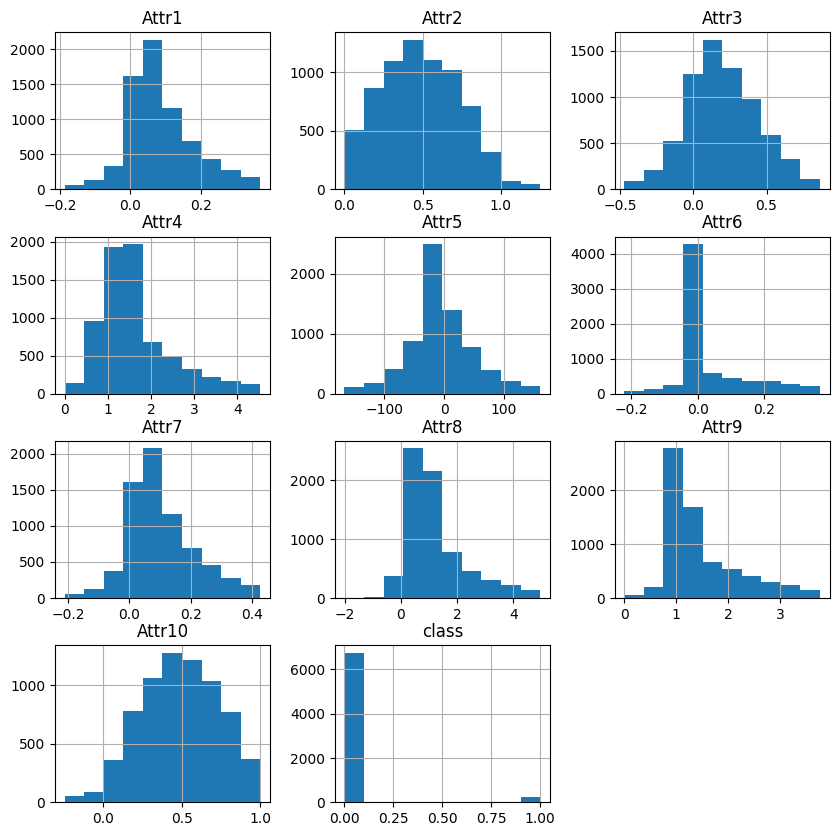

In [17]:
df.hist(figsize=(10,10))

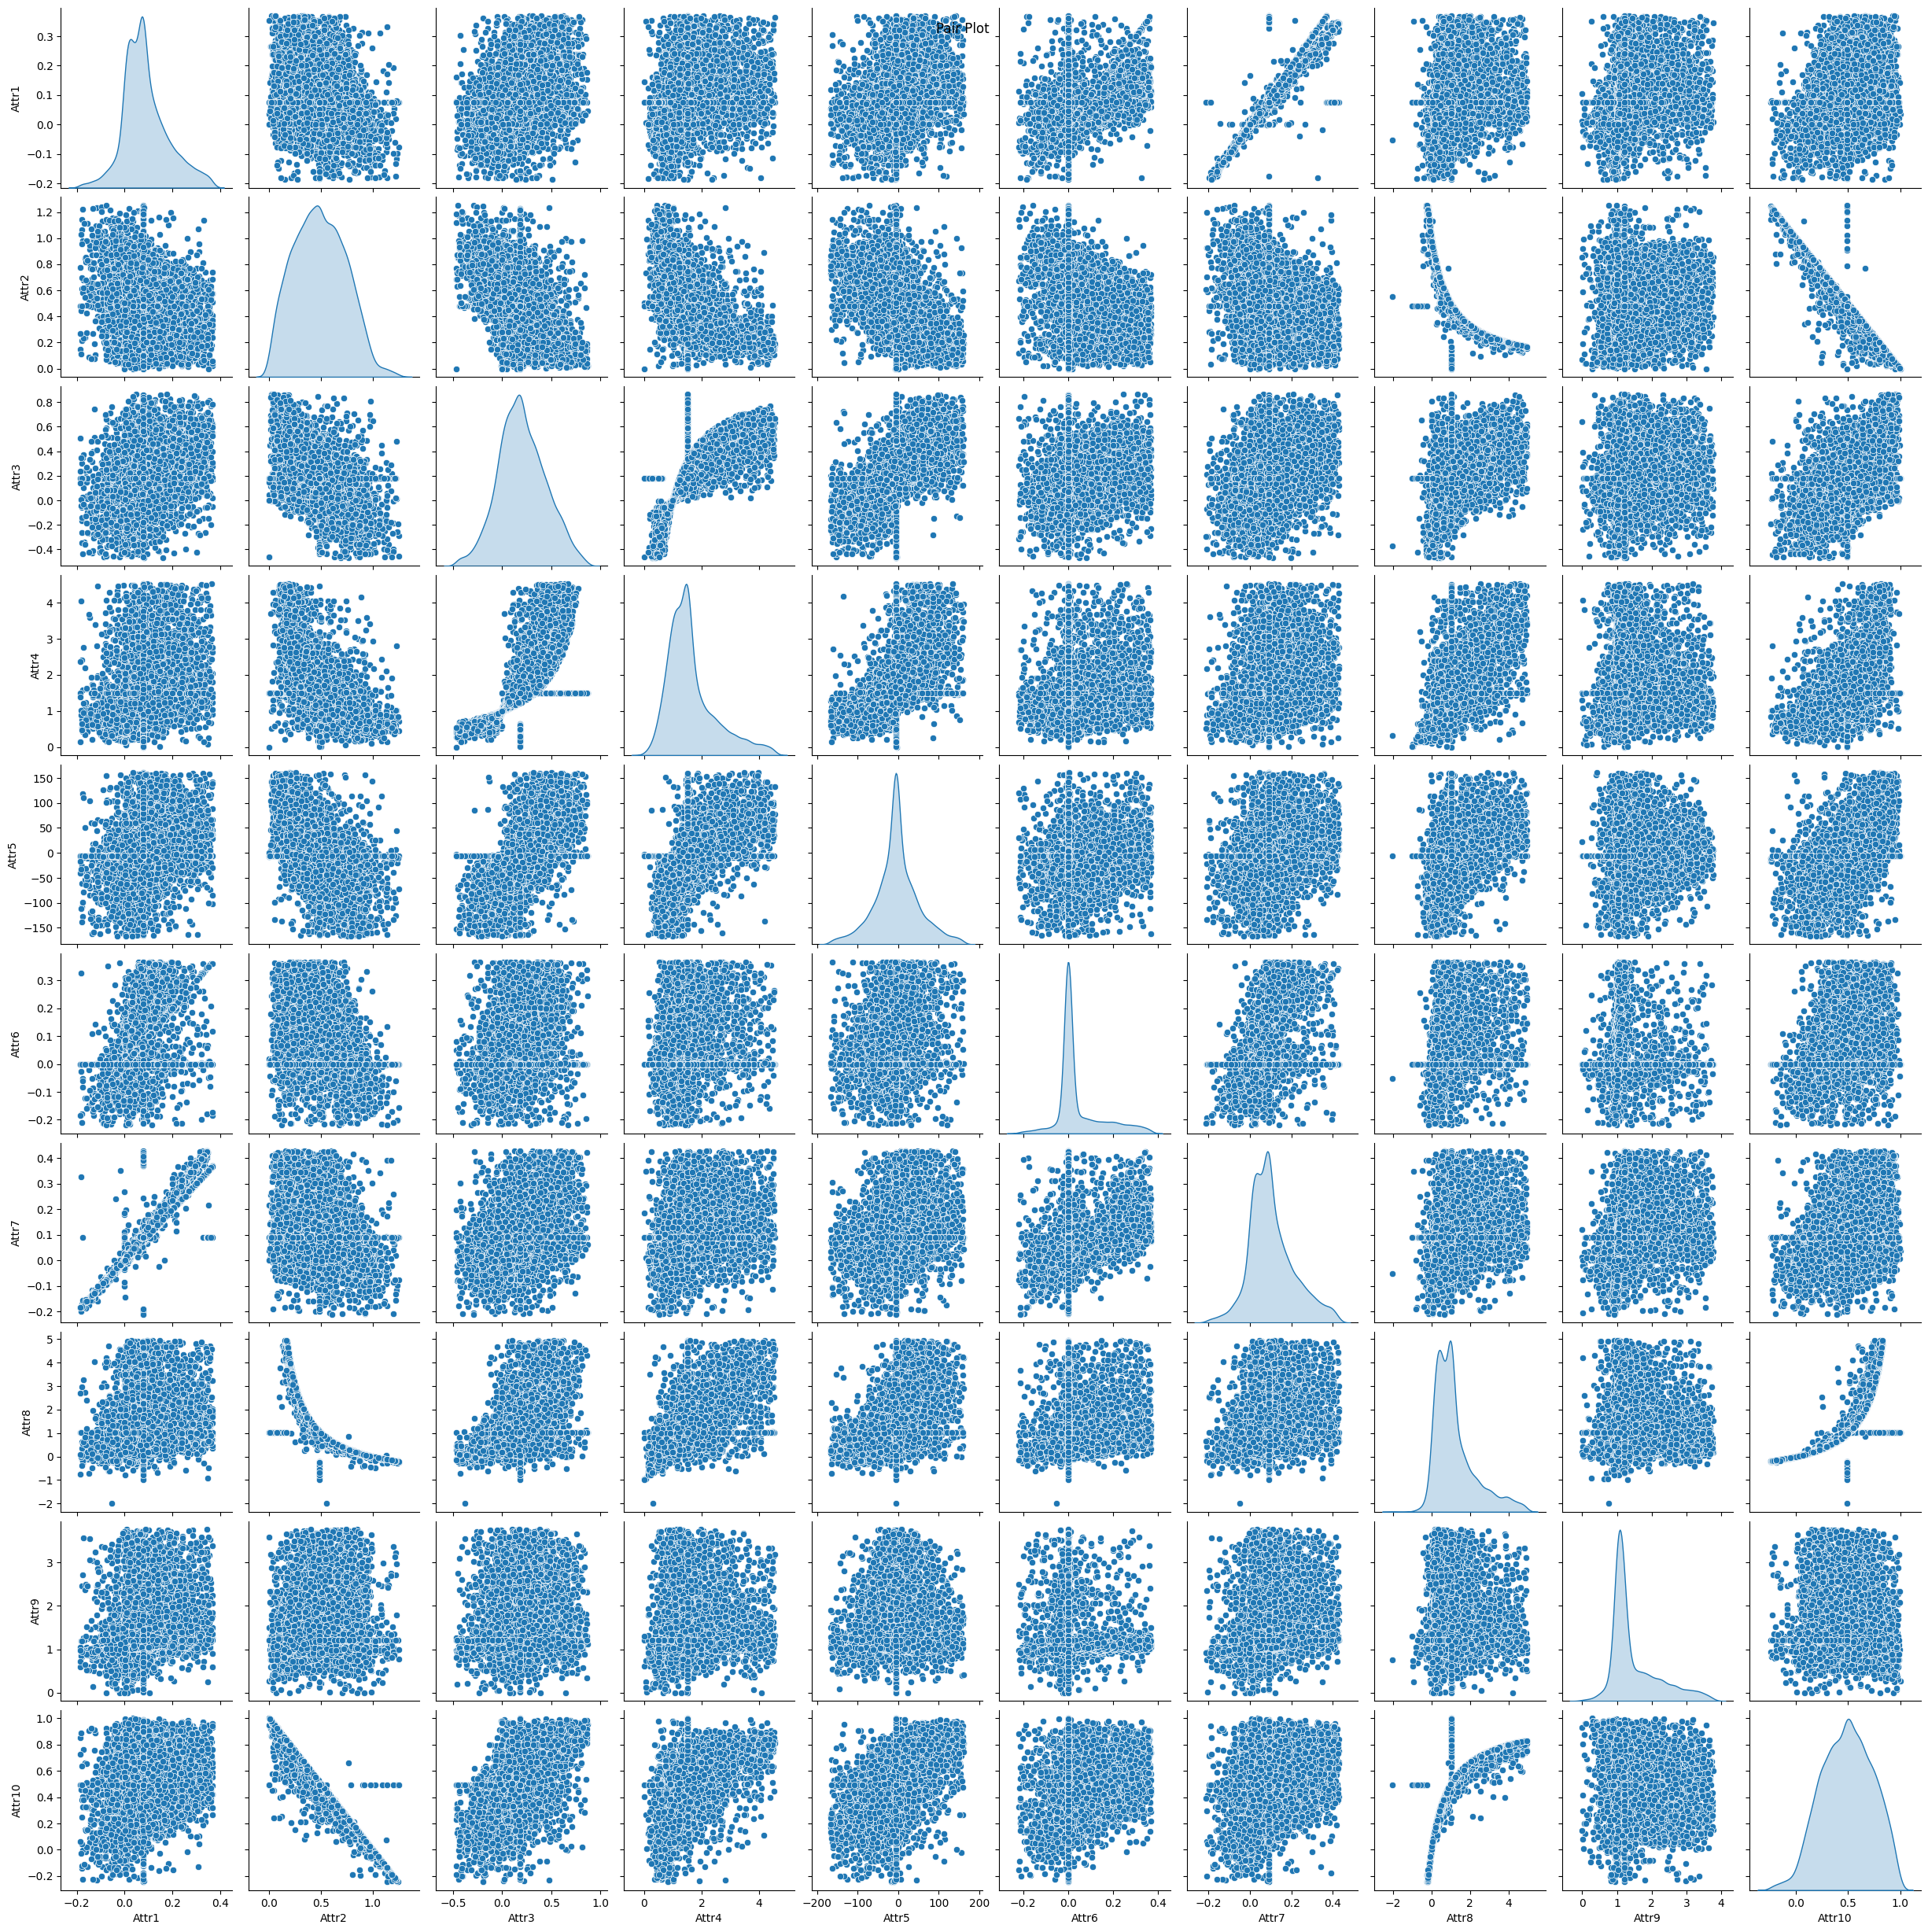

In [18]:
sns.pairplot(data=df, vars = ["Attr1","Attr2","Attr3","Attr4","Attr5","Attr6","Attr7","Attr8","Attr9","Attr10"], diag_kind='kde', kind='scatter')
plt.suptitle(f'Pair Plot')
plt.show()

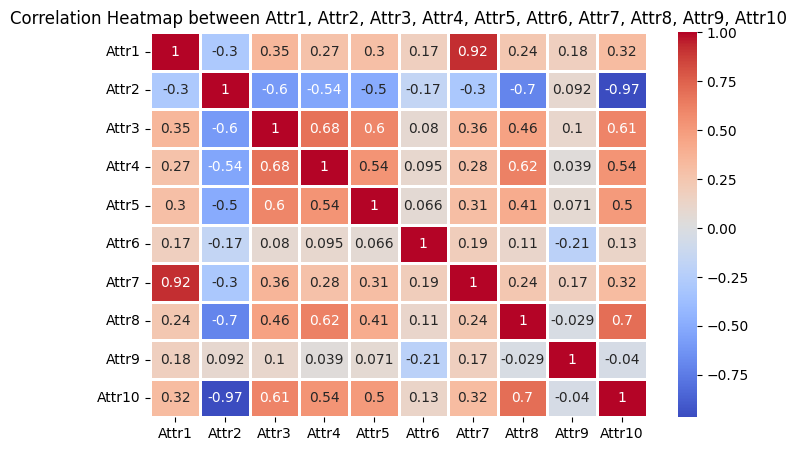

In [19]:
var_corr =["Attr1","Attr2","Attr3","Attr4","Attr5","Attr6","Attr7","Attr8","Attr9","Attr10"]
correlation_matrix = df[var_corr].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(var_corr)}')
plt.show()

# Model Building

In [20]:
y=df["class"]
x=df.drop(columns=['class'])

In [21]:
x.head(2)

Attr1    Attr2    Attr3   Attr4   Attr5  Attr6    Attr7    Attr8   Attr9  \
0  0.20055  0.37951  0.39641  2.0472  32.351    0.0  0.24976  1.33050  1.1389   
1  0.20912  0.49988  0.47225  1.9447  14.786    0.0  0.25834  0.99601  1.6996   

    Attr10  
0  0.50494  
1  0.49788

In [22]:
scale=MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(x),columns =x.columns)
X_scaled.head(2)

Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0  0.697457  0.302905  0.648900  0.451462  0.607668  0.375004  0.721731   
1  0.712894  0.398978  0.705722  0.428858  0.554072  0.375004  0.735139   

      Attr8     Attr9    Attr10  
0  0.478890  0.302440  0.602579  
1  0.430841  0.451336  0.596911

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape

(5609, 10)

In [25]:
x_test.shape

(1403, 10)

In [26]:
df['class'].value_counts()

0    6756
1     256
Name: class, dtype: int64

In [27]:
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [28]:
y_train.value_counts()

0    5401
1     208
Name: class, dtype: int64

In [29]:
y_train_smote.value_counts()

0    5401
1    5401
Name: class, dtype: int64

##### SVM

In [30]:
model = SVC()
parameters ={'kernel':['linear','rbf','sigmoid'],
             'C':[0.01, 0.1, 1, 10, 100],
             'gamma':['scale','auto']}
clf = GridSearchCV(model,param_grid = parameters,verbose =2)

In [31]:
clf.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   2.2s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   1.8s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   1.8s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   2.3s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   4.5s
[CV] END ................C=0.01, gamma=scale, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [32]:
clf.best_score_

0.9056658011551579

In [33]:
clf.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [34]:
model1 =SVC(C=100,gamma='scale',kernel = 'rbf')
model1.fit(x_train_smote,y_train_smote)

SVC(C=100)

In [35]:
y_pred= model1.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy_svc)

Accuracy: 0.8175338560228083


In [36]:
pd.crosstab(y_test,y_pred)

col_0     0    1
class           
0      1130  225
1        31   17

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1355
           1       0.07      0.35      0.12        48

    accuracy                           0.82      1403
   macro avg       0.52      0.59      0.51      1403
weighted avg       0.94      0.82      0.87      1403



##### Logistic Regression

In [38]:
model2 = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 10, 15, 25, 100],  # Inverse of regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs', 'newton-cg']  # Optimization algorithm
}

In [39]:
clf = GridSearchCV(model2,param_grid = parameters,verbose =2)
clf.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 10, 15, 25,
                               100],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             verbose=2)

In [40]:
clf.best_score_

0.6697828508749378

In [41]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [42]:
model2 =LogisticRegression(C=25,penalty='l2',solver = 'lbfgs')
model2.fit(x_train_smote,y_train_smote)

LogisticRegression(C=25)

In [43]:
y_pred = model2.predict(x_test)
accuracy_lt = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy_lt)

Accuracy: 0.6008553100498931


In [44]:
pd.crosstab(y_test,y_pred)

col_0    0    1
class          
0      811  544
1       16   32

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74      1355
           1       0.06      0.67      0.10        48

    accuracy                           0.60      1403
   macro avg       0.52      0.63      0.42      1403
weighted avg       0.95      0.60      0.72      1403



In [46]:
probability  = model2.predict_proba(x_test)[:,1]
probability

array([0.23353169, 0.65697755, 0.48716832, ..., 0.79435685, 0.32490013,
       0.25132861])

In [47]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

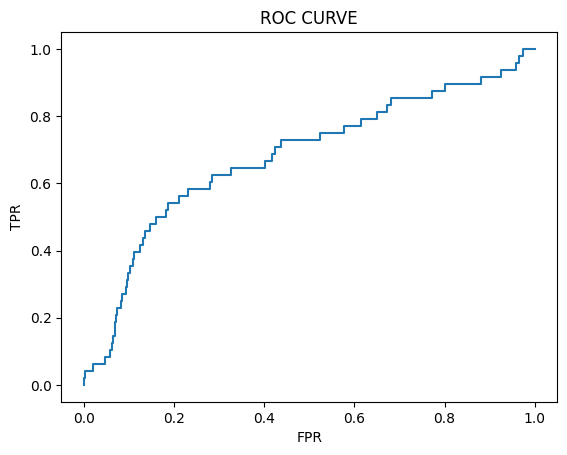

In [48]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [49]:
roc_auc_score(y_test,probability)

0.6792435424354243

##### RandomForest Classifier

In [50]:
model3 =RandomForestClassifier(criterion='entropy')
parameters = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [51]:
clf = GridSearchCV(model3,param_grid = parameters,verbose =2)
clf.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300]},
             verbose=2)

In [52]:
clf.best_score_

0.9565823007181175

In [53]:
clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [54]:
model3 =RandomForestClassifier(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators=300)
model3.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300)

In [55]:
y_pred= model3.predict(x_test)
accuracy_rt = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy_rt)

Accuracy: 0.9294369208838203


In [56]:
pd.crosstab(y_test,y_pred)

col_0     0   1
class          
0      1298  57
1        42   6

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1355
           1       0.10      0.12      0.11        48

    accuracy                           0.93      1403
   macro avg       0.53      0.54      0.54      1403
weighted avg       0.94      0.93      0.93      1403



##### ANN

In [58]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [59]:
classification.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'] )

In [60]:
classification.fit(x_train_smote, y_train_smote, epochs=100, batch_size=128)

Epoch 1/100
85/85 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.6552
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6838
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7103
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7363
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7545
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7700
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7779
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7934
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7990
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8057
Epoch 11/

In [61]:
y_pred = classification.predict(x_test)

44/44 [==============================] - 0s 959us/step


In [62]:
y_pred =y_pred.flatten().astype('int')

In [63]:
pd.DataFrame({'Actual y_value': y_test.values.flatten(), 'Predicted y_value': y_pred.flatten().astype(int)}).head(10)

Actual y_value  Predicted y_value
0               0                  0
1               0                  0
2               0                  0
3               0                  0
4               0                  0
5               0                  0
6               0                  0
7               0                  0
8               0                  0
9               0                  0

In [64]:
accuracy_ann = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy_ann)

Accuracy: 0.9657875980042766


In [65]:
pd.crosstab(y_test,y_pred)

col_0     0
class      
0      1355
1        48

##### KNN

In [66]:
model5= KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]                        # Minkowski distance power parameter
}

In [67]:
grid_search = GridSearchCV(estimator=model5, param_grid=param_grid, cv=5)
grid_search.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [68]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [69]:
test_accuracy = best_estimator.score(x_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.819672131147541


In [70]:
y_pred = best_estimator.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.819672131147541


In [71]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      1355
           1       0.03      0.15      0.05        48

    accuracy                           0.82      1403
   macro avg       0.50      0.49      0.48      1403
weighted avg       0.93      0.82      0.87      1403



# Performance Testing

In [72]:
accuracy_df = pd.DataFrame({
    'Models': ['SVM', 'Randomforest', 'ANN', 'Logistic_reg', 'KNN'],
    'Accuracy' : [accuracy_svc*100, accuracy_rt*100, accuracy_ann*100, accuracy_lt*100, accuracy_knn*100]
})

print(accuracy_df)

         Models   Accuracy
0           SVM  81.753386
1  Randomforest  92.943692
2           ANN  96.578760
3  Logistic_reg  60.085531
4           KNN  81.967213


<BarContainer object of 5 artists>

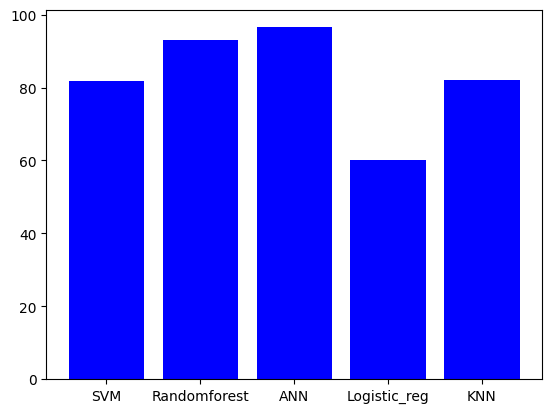

In [73]:
models = ['SVM', 'Randomforest', 'ANN', 'Logistic_reg', 'KNN']
accuracies = [accuracy_svc*100, accuracy_rt*100, accuracy_ann*100, accuracy_lt*100, accuracy_knn*100]
plt.bar(models, accuracies, color='blue')

# Saving the Model

In [74]:
pickle.dump(model3,open('project.pkl','wb'))

# Testing the Saved Model

In [75]:
with open(r'/content/project.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [76]:
# Reshape your input as a 2D array (a single sample with multiple features)
input_data = np.array([0.697457,0.302905,0.648900,0.451462,0.607668,0.375004,0.721731,0.478890,0.302440,0.602579]).reshape(1, -1)

# Use the loaded model to make predictions
predictions = loaded_model.predict(input_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])